<a href="https://colab.research.google.com/github/analuisabarcelos/mvp-ed-sprint2/blob/main/MVP_2_v2_Ana_Luisa_Barcelos_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

**Nome:** Ana Luisa Barcelos

**Matrícula:** 4052024001930

**Dataset:** [Transações no varejo de roupas](https://drive.google.com/file/d/1e6J6rBHcHkGc5GsvH2sYQlofx5r9-3eS/view?usp=sharing)

# Descrição do Problema

O conjunto de dados Transações é uma pequena parte do conjunto de dados aproveitado do MVP em Engenharia de dados da sprint anterior. O tema do conjunto é a venda de roupas no setor varejo. O dataset original é fictício e está disponível no link a seguir:
https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset.

## Objetivo

O objetivo deste MVP é prever a forma de pagamento no setor de compras no segmento de moda, para planejamento de marketing e arrecadação.

## Tipo de Problema

O objetivo é prever a **forma de pagamento** (`FormaPagamento`) usada em cada compra, que pode ser, por exemplo, 'Credit Card', 'Cash', entre outros. <p>
Este é um problema de **classificação supervisionada** e a análise revela padrões de comportamento do cliente, como preferências de pagamento baseadas no valor da compra, categoria do produto ou localização.

## Hipóteses do Problema

1) Transações de maior valor (`TotalFatura`) são mais propensas a usar cartão de crédito devido à conveniência ou disponibilidade de crédito

2) A forma de pagamento varia por localização (`Pais`)

3) Clientes mais jovens (`DataNascimento`) preferem formas de pagamento digitais, como cartão de crédito, em vez de dinheiro

## Seleção de Dados

O conjunto de dados utilizado neste MVP refere-se a transações do mercado de varejo de moda. O tratamento inicial do dataset original, disponível no link Global Fashion Retail Stores Dataset [Kaggle](https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset), já foi realizado em um MVP anterior (sprint anterior). O resultado desse tratamento pode ser acessado [neste link]((https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/886918688332118/3133952307234159/4642728593528244/latest.html).

Para este MVP de Análise de Dados, foi realizado um JOIN entre três das tabelas geradas no MVP anterior: **Transações**, **Clientes** e **Produtos**, filtrado apenas transações de 2024 e da moeda USD. Esse tratamento resultou no conjunto de dados que será utilizado para as análises apresentadas a seguir.



## Atributos do Dataset

O dataset contem **770.991** amostras e **21** atributos:

- **IDFatura**: Identificador único da fatura (qualitativo)
- **Item**: Número do item na fatura (qualitativo)
- **IDCliente**: Identificador do cliente (qualitativo)
- **IDProduto**: Identificador do produto (qualitativo)
- **Tamanho**: Tamanho do produto, ex.:, P, M, G (qualitativo)
- **Cor**: Cor do produto (qualitativo)
- **Categoria**: Categoria do produto, ex.:, Children, Masculine, Feminine (qualitativo)
- **SubCategoria**: Subcategoria do produto, ex.:, Sweaters, Suits and Blazers (qualitativo)
- **PrecoUnitario**: Preço unitário do produto (quantitativo)
- **Quantidade**: Quantidade comprada (quantitativo)
- **DataCompra**: Data da compra (datetime)
- **Desconto**: Valor do desconto aplicado (quantitativo)
- **TotalItem**: Valor total do item (PrecoUnitario * Quantidade) (quantitativo)
- **TipoTransacao**: Tipo de transação, ex.:, Sale, Return (qualitativo, e consideraremos apenas Sale para este projeto)
- **FormaPagamento**: Forma de pagamento, ex.:, Credit Card, Cash (qualitativo, é a variável-alvo)
- **TotalFatura**: Valor total da fatura (quantitativo)
- **Cidade**: Cidade da transação (qualitativo)
- **Pais**: País da transação (qualitativo)
- **Genero**: Gênero do cliente, ex.:, M, F (qualitativo)
- **DataNascimento**: Data de nascimento do cliente (datetime)
- **Cargo**: Cargo do cliente no seu trabalho (qualitativo)

# Importação das Bibliotecas Necessárias e Carga de Dados

In [1]:
# Instalando o gdown para usar o arquivo do google drive
!pip install -q gdown

# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import datetime

In [2]:
# Carregando o dataset a partir de um link público do google drive
# Baixando o arquivo do Google Drive pelo ID
file_id = "130pG_3WkeGAGChBdY1jfc3n82CqVTro_"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=130pG_3WkeGAGChBdY1jfc3n82CqVTro_
From (redirected): https://drive.google.com/uc?id=130pG_3WkeGAGChBdY1jfc3n82CqVTro_&confirm=t&uuid=4927b81e-be60-4c83-9a3d-3783bdbfc4f1
To: /content/vtransacoes_publicoc.csv
100%|██████████| 148M/148M [00:01<00:00, 88.2MB/s]


'vtransacoes_publicoc.csv'

In [3]:
# Visualizando as primeiras linhas
df = pd.read_csv("vtransacoes_publicoc.csv")
df.head()

,IDFatura,Item,IDCliente,IDProduto,Tamanho,Cor,Categoria,SubCategoria,PrecoUnitario,Quantidade,...,Desconto,TotalItem,TipoTransacao,FormaPagamento,TotalFatura,Cidade,Pais,Genero,DataNascimento,Cargo
0,INV-US-001-03713741,1,1,6316,P,NaN,Children,Sweaters,35.0,1,...,0.0,35.0,Sale,Credit Card,155.5,New York,United States,M,2003-07-15T00:00:00.000Z,NaN
1,INV-US-001-03713741,2,1,8597,M,NaN,Masculine,Suits and Blazers,62.0,1,...,0.0,62.0,Sale,Credit Card,155.5,New York,United States,M,2003-07-15T00:00:00.000Z,NaN
2,INV-US-001-03713741,3,1,8240,G,NaN,Children,Sweaters,25.0,2,...,0.0,50.0,Sale,Credit Card,155.5,New York,United States,M,2003-07-15T00:00:00.000Z,NaN
3,INV-US-001-03713741,4,1,8877,NaN,SILVER,Feminine,Accessories,8.5,1,...,0.0,8.5,Sale,Credit Card,155.5,New York,United States,M,2003-07-15T00:00:00.000Z,NaN
4,INV-US-001-03716170,1,1,6236,M,BURGUNDY,Children,"Girl and Boy (1-5 years, 6-14 years)",41.5,3,...,0.0,124.5,Sale,Credit Card,124.5,New York,United States,M,2003-07-15T00:00:00.000Z,NaN


In [4]:
# Verificar os valores distintos na coluna TipoTransacao
print("Valores distintos na coluna 'TipoTransacao':")
print(df['TipoTransacao'].unique())

Valores distintos na coluna 'TipoTransacao':
['Sale' 'Return']


In [5]:
# Considerar apenas transações do tipo venda (Sale)
df_transacoes = df[df['TipoTransacao'] == 'Sale']

# Análise exploratória

## Estatística descritiva

In [6]:
# Verificando linhas e colunas do dataset (dimensões)
print("Dimensões do dataset para linhas e colunas, respectivamente:", df_transacoes.shape)

Dimensões do dataset para linhas e colunas, respectivamente: (730337, 21)


In [7]:
# Verificando os tipos de dados do dataset
print("\nTipos de dados:\n", df_transacoes.dtypes)


Tipos de dados:
 IDFatura           object
Item                int64
IDCliente           int64
IDProduto           int64
Tamanho            object
Cor                object
Categoria          object
SubCategoria       object
PrecoUnitario     float64
Quantidade          int64
DataCompra         object
Desconto          float64
TotalItem         float64
TipoTransacao      object
FormaPagamento     object
TotalFatura       float64
Cidade             object
Pais               object
Genero             object
DataNascimento     object
Cargo              object
dtype: object


 8 atributos estão como tipo numérico/quantitativo e 13 atributos restantes estão como tipo categórico/qualitativo

In [8]:
# Valores nulos
print('\nValores nulos:')
print(df_transacoes.isnull().sum())


Valores nulos:
IDFatura               0
Item                   0
IDCliente              0
IDProduto              0
Tamanho            46774
Cor               494732
Categoria              0
SubCategoria           0
PrecoUnitario          0
Quantidade             0
DataCompra             0
Desconto               0
TotalItem              0
TipoTransacao          0
FormaPagamento         0
TotalFatura            0
Cidade                 0
Pais                   0
Genero                 0
DataNascimento         0
Cargo             306880
dtype: int64


Há valores nulos nas colunas Tamanho, Cor e Cargo, que serão tratados mais a frente

In [9]:
# Estatísticas descritivas para variáveis numéricas relevantes
print('\nEstatísticas:')
print(df_transacoes[['PrecoUnitario', 'Quantidade', 'TotalItem', 'TotalFatura']].describe())


Estatísticas:
       PrecoUnitario     Quantidade      TotalItem    TotalFatura
count  730337.000000  730337.000000  730337.000000  730337.000000
mean       53.277323       1.099712      50.917004     109.617920
std        27.717295       0.395435      36.853773     108.247945
min         4.000000       1.000000       2.400000       2.400000
25%        34.000000       1.000000      27.500000      37.500000
50%        46.500000       1.000000      41.270000      68.000000
75%        66.000000       1.000000      62.500000     140.500000
max       150.500000       3.000000     451.500000    1070.500000


Percebemos que `PrecoUnitario` varia de 4.0 a 150.0 e `TotalFatura` de 2.4 a 1070.5, sugerindo que, mais a frente, a normalização será necessária caso essas colunas sejam usadas para modelagem. Essa mesma observação vale para as outras 2 colunas numéricas.<p>
Uma observação é que o valor mínimo de `TotalFatura` é menor do que o mínimo de `PrecoUnitario` por causa da aplicação de `Desconto`.<p>
A maioria das transações (75%) envolvem apenas 1 produto (Quantidade), e a maior quantidade de produtos em uma única venda foi 3.<p>
O preço unitário médio (PrecoUnitario) é 53,28 dólares, com variação significativa (desvio padrão de 27.72 dólares), indicando diversidade nos produtos vendidos

## Visualização de gráficos

Incluiremos a coluna `Idade`, que usaremos mais a frente

In [10]:
# Converter a coluna para datetime e remover o fuso horário presente
df_transacoes['DataNascimento'] = pd.to_datetime(df_transacoes['DataNascimento'], utc=True).dt.tz_localize(None)
df_transacoes['DataCompra'] = pd.to_datetime(df_transacoes['DataCompra'], utc=True).dt.tz_localize(None)

# Calcular idade com base na data da compra
df_transacoes['Idade'] = (df_transacoes['DataCompra'] - df_transacoes['DataNascimento']).dt.days // 365

display(df_transacoes)

/tmp/ipython-input-10-104845598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transacoes['DataNascimento'] = pd.to_datetime(df_transacoes['DataNascimento'], utc=True).dt.tz_localize(None)
/tmp/ipython-input-10-104845598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transacoes['DataCompra'] = pd.to_datetime(df_transacoes['DataCompra'], utc=True).dt.tz_localize(None)
/tmp/ipython-input-10-104845598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,IDFatura,Item,IDCliente,IDProduto,Tamanho,Cor,Categoria,SubCategoria,PrecoUnitario,Quantidade,...,TotalItem,TipoTransacao,FormaPagamento,TotalFatura,Cidade,Pais,Genero,DataNascimento,Cargo,Idade
0,INV-US-001-03713741,1,1,6316,P,NaN,Children,Sweaters,35.0,1,...,35.00,Sale,Credit Card,155.50,New York,United States,M,2003-07-15,NaN,20
1,INV-US-001-03713741,2,1,8597,M,NaN,Masculine,Suits and Blazers,62.0,1,...,62.00,Sale,Credit Card,155.50,New York,United States,M,2003-07-15,NaN,20
2,INV-US-001-03713741,3,1,8240,G,NaN,Children,Sweaters,25.0,2,...,50.00,Sale,Credit Card,155.50,New York,United States,M,2003-07-15,NaN,20
3,INV-US-001-03713741,4,1,8877,NaN,SILVER,Feminine,Accessories,8.5,1,...,8.50,Sale,Credit Card,155.50,New York,United States,M,2003-07-15,NaN,20
4,INV-US-001-03716170,1,1,6236,M,BURGUNDY,Children,"Girl and Boy (1-5 years, 6-14 years)",41.5,3,...,124.50,Sale,Credit Card,124.50,New York,United States,M,2003-07-15,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770986,INV-US-002-02011557,1,1638012,13708,36,NaN,Feminine,Pants and Jeans,52.0,3,...,156.00,Sale,Credit Card,156.00,Coimbra,Portugal,M,1996-02-13,Social researcher,28
770987,INV-US-003-03956512,1,1638145,11560,38,NaN,Masculine,Pants and Jeans,35.5,1,...,35.50,Sale,Cash,106.50,Coimbra,Portugal,F,1973-04-28,Clinical biochemist,50
770988,INV-US-003-03956512,2,1638145,9205,S,RED,Feminine,Coats and Blazers,71.0,1,...,71.00,Sale,Cash,106.50,Coimbra,Portugal,F,1973-04-28,Clinical biochemist,50
770989,INV-US-002-02051196,1,1641864,12797,S,NaN,Feminine,T-shirts and Tops,24.5,1,...,12.25,Sale,Credit Card,12.25,Montemor-o-Velho,Portugal,F,1971-06-09,Microbiologist,53


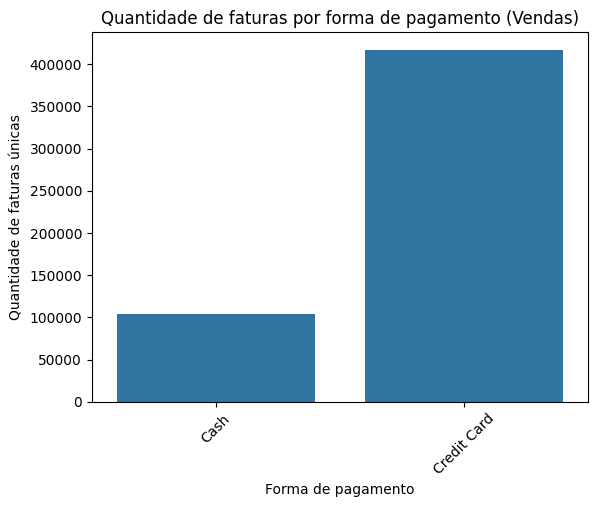

In [11]:
# Distribuição de FormaPagamento
# Contar a quantidade de IDFatura distinta por FormaPagamento
faturas_por_pagamento = df_transacoes.groupby('FormaPagamento')['IDFatura'].nunique().reset_index()
faturas_por_pagamento.columns = ['FormaPagamento', 'QtdFaturas']

# Plotar o gráfico com base na contagem de IDFatura distintas
plt.figure()
sns.barplot(x='FormaPagamento', y='QtdFaturas', data=faturas_por_pagamento)
plt.title('Quantidade de faturas por forma de pagamento (Vendas)')
plt.xlabel('Forma de pagamento')
plt.ylabel('Quantidade de faturas únicas')
plt.xticks(rotation=45)
plt.show()

A maior parte das vendas é feita usando cartão de crédito

In [12]:
# Considerando IDFatura distintas para as próximas análises
df_faturas_distintas = df_transacoes.drop_duplicates(subset='IDFatura')

In [13]:
# Verificando linhas e colunas do dataset (dimensões)
print("Dimensões do dataset para linhas e colunas, respectivamente:", df_faturas_distintas.shape)

Dimensões do dataset para linhas e colunas, respectivamente: (520874, 22)


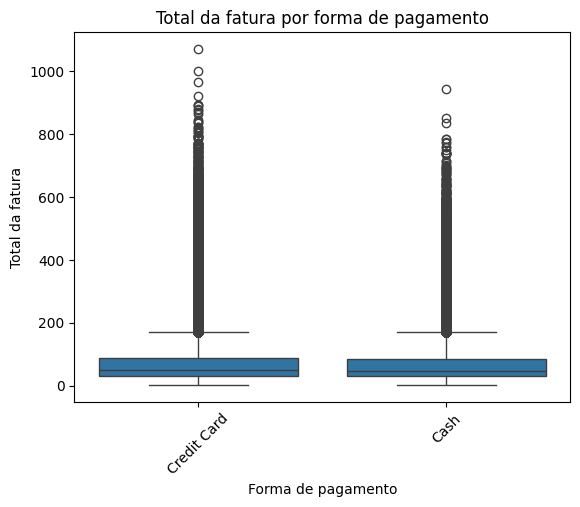

In [14]:
# Distribuição da forma de pagamento por valor total da fatura
# Apresentar o boxplot de TotalFatura por FormaPagamento
plt.figure()
sns.boxplot(x='FormaPagamento', y='TotalFatura', data=df_faturas_distintas)
plt.title('Total da fatura por forma de pagamento')
plt.xlabel('Forma de pagamento')
plt.ylabel('Total da fatura')
plt.xticks(rotation=45)
plt.show()

Pelo gráfico acima, vê-se que a mediana é bem próxima para as duas formas de pagamento, sugerindo que **geralmente o valor da fatura é similar nas duas formas de pagamento**<p>
Além disso, há muitos **outliers em termos de valor total da fatura tanto para pagamento em cartão de crédito como em dinheiro**<p>
Os outliers estão mais "próximos" no pagamento por dinheiro, sugerindo **menos variação de valor entre os outliers nos pagamentos feitos em dinheiro**.

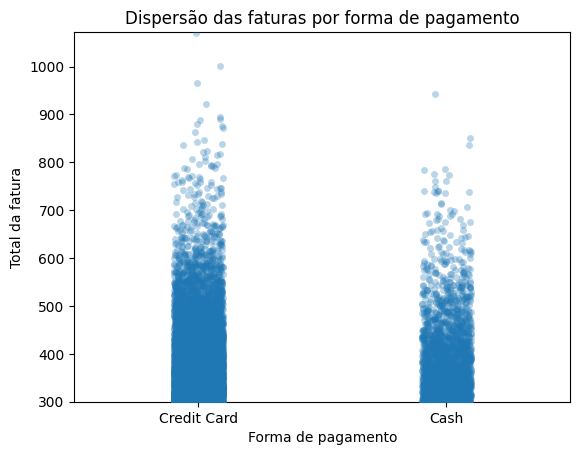

In [15]:
# Olhando mais de perto os outliers
plt.figure()
sns.stripplot(x='FormaPagamento', y='TotalFatura', data=df_faturas_distintas, jitter=True, alpha=0.3)
plt.ylim(300, 1072)
plt.title('Dispersão das faturas por forma de pagamento')
plt.xlabel('Forma de pagamento')
plt.ylabel('Total da fatura')
plt.show()

Ainda falando em outliers, as faturas mais caras são pagas no cartão de crédito

/tmp/ipython-input-16-2957051236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faturas_distintas['FaixaValor'] = pd.cut(df_faturas_distintas['TotalFatura'], bins=[0, 100, 200, 300, 500, 1100], right=False)
/tmp/ipython-input-16-2957051236.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao = df_faturas_distintas.groupby('FaixaValor')['FormaPagamento'].value_counts(normalize=True).unstack()


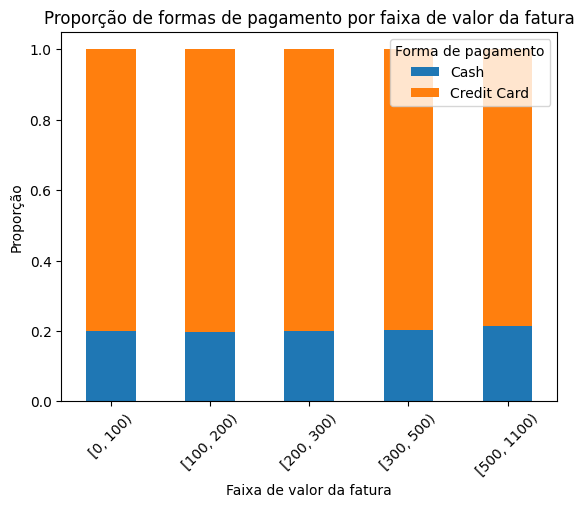

In [16]:
# Verificando por faixas de valor a proporção de pagamento em cartão VS dinheiro em cada faixa
df_faturas_distintas['FaixaValor'] = pd.cut(df_faturas_distintas['TotalFatura'], bins=[0, 100, 200, 300, 500, 1100], right=False)

# Tabela de proporções
proporcao = df_faturas_distintas.groupby('FaixaValor')['FormaPagamento'].value_counts(normalize=True).unstack()
proporcao.plot(kind='bar', stacked=True)
plt.title('Proporção de formas de pagamento por faixa de valor da fatura')
plt.ylabel('Proporção')
plt.xlabel('Faixa de valor da fatura')
plt.xticks(rotation=45)
plt.legend(title='Forma de pagamento')
plt.show()

A proporção de faturas pagas (vendas feitas) com cartão de crédito parece crescer levemente conforme o valor da fatura fica mais caro, porém não é significativo

/tmp/ipython-input-17-3737306340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faturas_distintas['DataNascimento'] = pd.to_datetime(df_faturas_distintas['DataNascimento'], utc=True).dt.tz_localize(None)
/tmp/ipython-input-17-3737306340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faturas_distintas['DataCompra'] = pd.to_datetime(df_faturas_distintas['DataCompra'], utc=True).dt.tz_localize(None)
/tmp/ipython-input-17-3737306340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

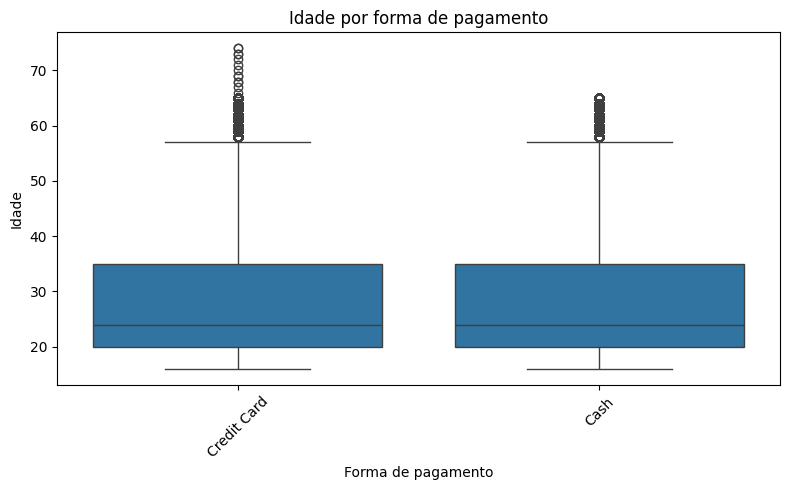

In [17]:
# Vamos verificar a forma de pagamento em relação a faixa etária (idade)
# Converter a coluna para datetime e remover o fuso horário presente
df_faturas_distintas['DataNascimento'] = pd.to_datetime(df_faturas_distintas['DataNascimento'], utc=True).dt.tz_localize(None)
df_faturas_distintas['DataCompra'] = pd.to_datetime(df_faturas_distintas['DataCompra'], utc=True).dt.tz_localize(None)

# Calcular idade com base na data da compra
df_faturas_distintas['Idade'] = (df_faturas_distintas['DataCompra'] - df_faturas_distintas['DataNascimento']).dt.days // 365

# Plotar boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='FormaPagamento', y='Idade', data=df_faturas_distintas)
plt.title('Idade por forma de pagamento')
plt.xlabel('Forma de pagamento')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pelo boxplot acima, vemos que a idade não influencia na `forma de pagamento`, a mediana é praticamente igual entre cartão de crédito e dinheiro. Vamos explorar um pouco mais nas próximas células para ter certeza disso<p>
Porém, os pontos fora da caixa, ou seja, os outliers de cartão de crédito (Credit Card) chegam a idades mais altas. Isso não quer dizer que os idosos preferem cartão, mas há mais casos isolados de clientes mais velhos usando cartão de crédito do que usando dinheiro.<p>

In [18]:
# Média e mediana da idade por forma de pagamento
idade_stats = df_faturas_distintas.groupby('FormaPagamento')['Idade'].agg(['mean', 'median', 'count'])
print(idade_stats)

                     mean  median   count
FormaPagamento                           
Cash            28.564688    24.0  103845
Credit Card     28.562580    24.0  417029


/tmp/ipython-input-19-4260691159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faturas_distintas['FaixaEtaria'] = pd.cut(df_faturas_distintas['Idade'], bins=bins, labels=labels, right=True)


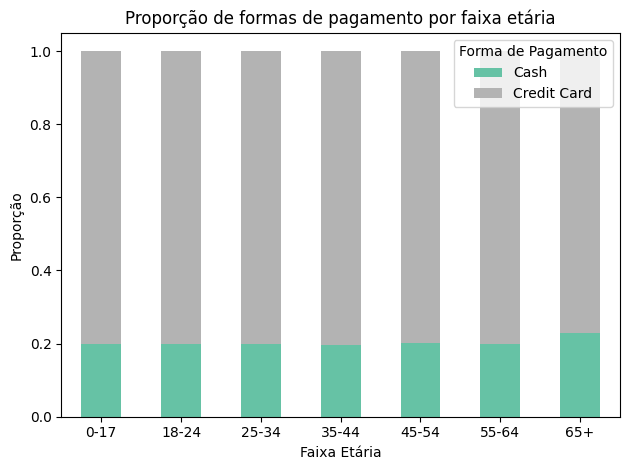

In [19]:
# Criar faixas etárias
bins = [0, 17, 24, 34, 44, 54, 64, 80]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_faturas_distintas['FaixaEtaria'] = pd.cut(df_faturas_distintas['Idade'], bins=bins, labels=labels, right=True)

# Proporção de formas de pagamento por faixa etária
proporcao_idade = (
    df_faturas_distintas
    .groupby('FaixaEtaria', observed=False)['FormaPagamento']
    .value_counts(normalize=True)
    .unstack()
)

# Plotar gráfico
proporcao_idade.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proporção de formas de pagamento por faixa etária')
plt.ylabel('Proporção')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.legend(title='Forma de Pagamento')
plt.tight_layout()
plt.show()

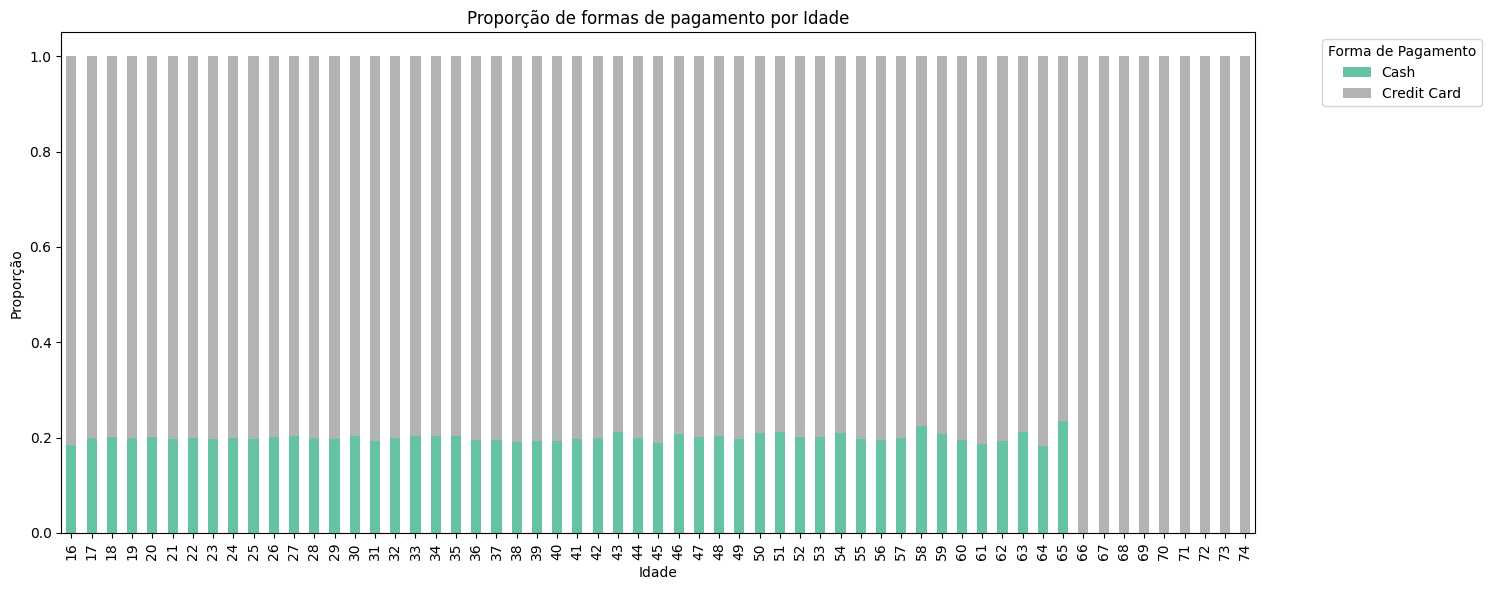

In [20]:
# Representatividade da forma de pagamento por Idade
proporcoes = df_faturas_distintas.groupby(['Idade', 'FormaPagamento']).size().unstack(fill_value=0)
proporcoes_percentual = proporcoes.div(proporcoes.sum(axis=1), axis=0)

# Plot
proporcoes_percentual.plot(kind='bar', stacked=True, figsize=(15,6), colormap='Set2')

plt.title('Proporção de formas de pagamento por Idade')
plt.xlabel('Idade')
plt.ylabel('Proporção')
plt.legend(title='Forma de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A média não tem diferença significativa entre os dois grupos, nem a proporção de pagamento é alterada de acordo com a faixa etária.<p>
Isso reforça que as pessoas de mais idade usam tanto o cartão de crédito quanto os jovens.

/tmp/ipython-input-21-1724307838.py:16: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-1724307838.py:16: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


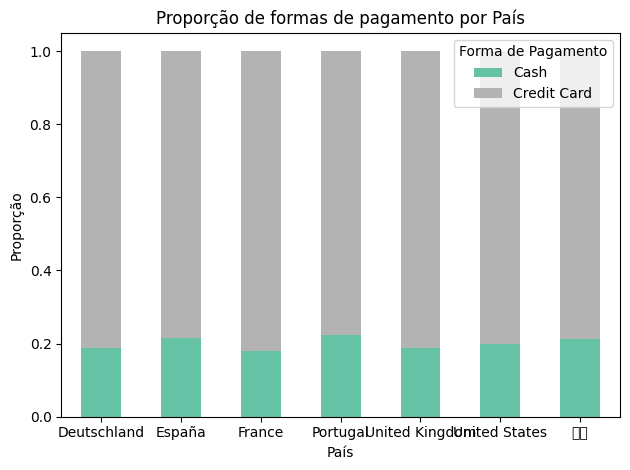

In [21]:
# Proporção de formas de pagamento por pais
proporcao_pais = (
    df_faturas_distintas
    .groupby('Pais', observed=False)['FormaPagamento']
    .value_counts(normalize=True)
    .unstack()
)

# Plotar gráfico
proporcao_pais.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proporção de formas de pagamento por País')
plt.ylabel('Proporção')
plt.xlabel('País')
plt.xticks(rotation=0)
plt.legend(title='Forma de Pagamento')
plt.tight_layout()
plt.show()

Observa-se que o país com maior quantidade de compras é Estados Unidos.<p>
Além disso, não há diferença significativa de representatividade de pagamentos por cartão de crédito ou dinheiro entre os países

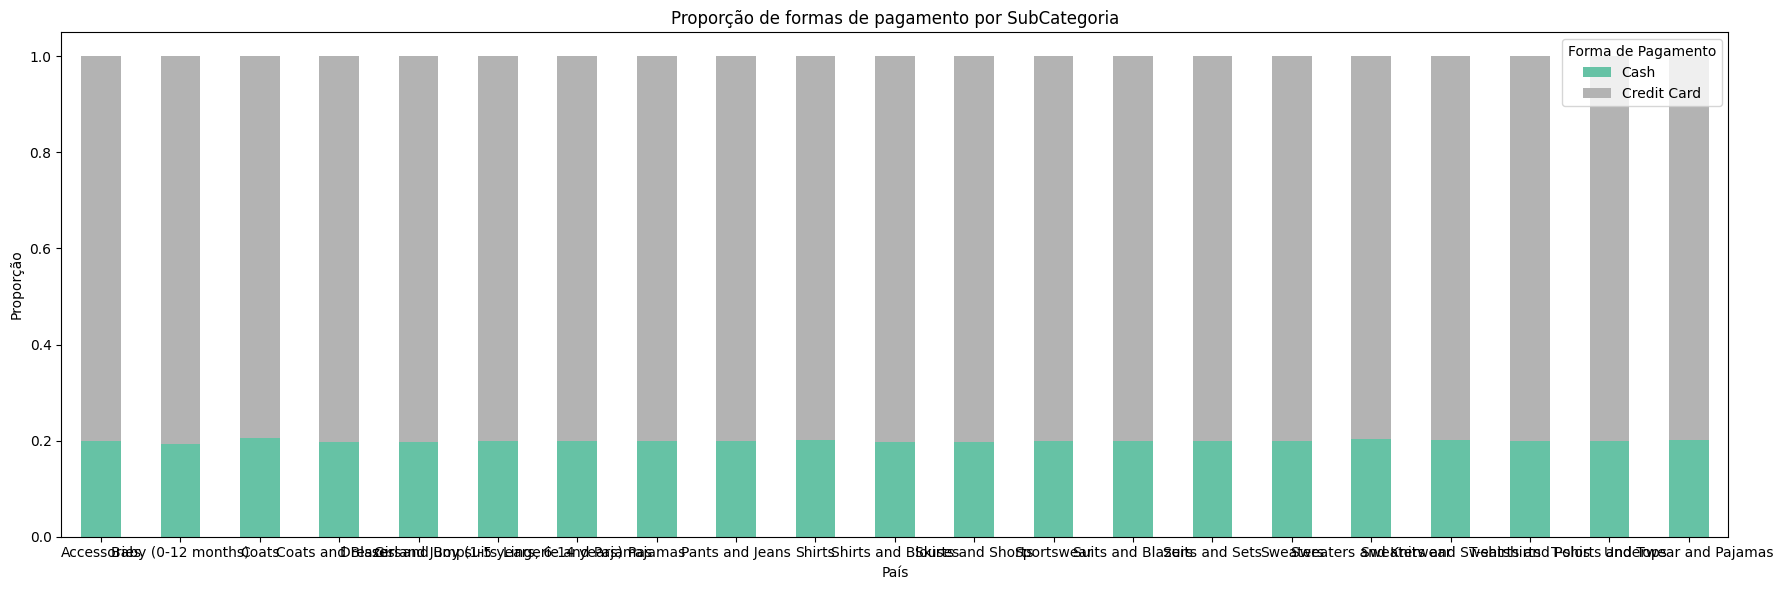

In [22]:
# Proporção de formas de pagamento por subcategoria
proporcao_pais = (
    df_faturas_distintas
    .groupby('SubCategoria', observed=False)['FormaPagamento']
    .value_counts(normalize=True)
    .unstack()
)

# Plotar gráfico
proporcao_pais.plot(kind='bar', stacked=True, colormap='Set2', figsize=(18,6))
plt.title('Proporção de formas de pagamento por SubCategoria')
plt.ylabel('Proporção')
plt.xlabel('País')
plt.xticks(rotation=0)
plt.legend(title='Forma de Pagamento')
plt.tight_layout()
plt.show()

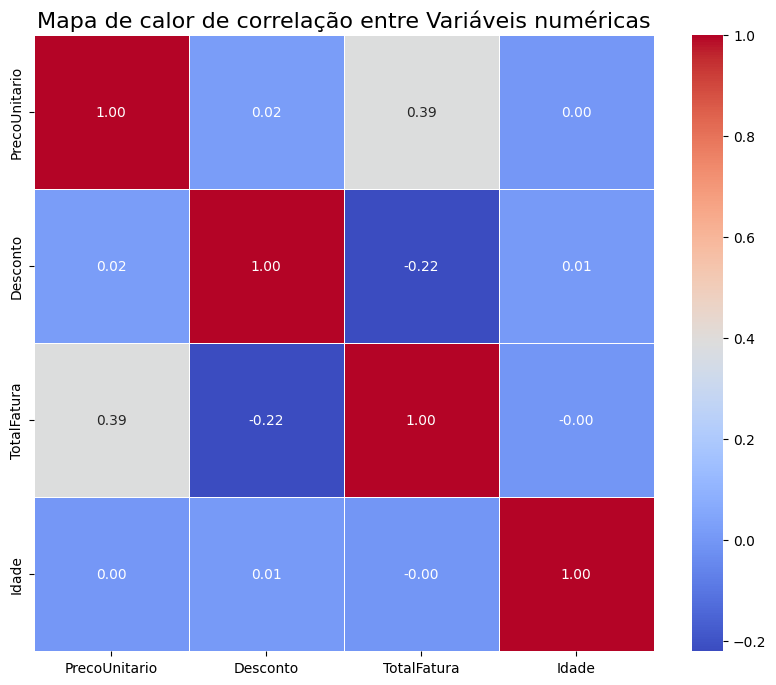

In [23]:
# Filtrando colunas numéricas para a correlação
col_numericas = df_faturas_distintas[['PrecoUnitario', 'Desconto', 'TotalFatura', 'Idade']]

# Calculando a matriz de correlação
correlation_matrix = col_numericas.corr()

# Plotando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de correlação entre Variáveis numéricas', fontsize=16)
plt.show()

# Respostas da Análise exploratória

1) O pagamento por cartão de crédito não é influenciado pelo valor da fatura (`TotalFatura`) ser alto

2) A forma de pagamento varia pouco por localização (`Pais`), sendo uma variação irrelevante

3) A maior parte dos pagamentos é por cartão de crédito. Os clientes com mais idade (`Idade`) pagam tanto por cartão de crédito quanto os mais jovens

# Pré-processamento de dados

## Tratamento de nulos

Observamos na etapa de Análise, 46.774 valores nulos em Tamanho, 494.732 nulos em Cor e 306.880 nulos em Cargo, representando, respectivamente . <p>
Tendo a quantidade desses valores, analisamos sua distribuição por Category e SubCategory. <p>
Isso será importante mais a frente, para decidir como trataremos esses valores.

In [24]:
# Verificar se os valores nulos estão concentrados em alguma categoria ou subcategoria
print("Valores nulos de Tamanho por categoria:")
print(df_faturas_distintas[df_faturas_distintas['Tamanho'].isnull()]['Categoria'].value_counts())
print("\nValores nulos de tamanho por subcategoria")
print(df_faturas_distintas[df_faturas_distintas['Tamanho'].isnull()]['SubCategoria'].value_counts())

print("\n\nValores nulos de Cor por categoria:")
print(df_faturas_distintas[df_faturas_distintas['Cor'].isnull()]['Categoria'].value_counts())
print("\nValores nulos de cor por subcategoria")
print(df_faturas_distintas[df_faturas_distintas['Cor'].isnull()]['SubCategoria'].value_counts())

Valores nulos de Tamanho por categoria:
Categoria
Masculine    11790
Feminine     11778
Children      9870
Name: count, dtype: int64

Valores nulos de tamanho por subcategoria
SubCategoria
Accessories    33438
Name: count, dtype: int64


Valores nulos de Cor por categoria:
Categoria
Feminine     167841
Masculine    151949
Children      33182
Name: count, dtype: int64

Valores nulos de cor por subcategoria
SubCategoria
Sportswear                              50246
Pants and Jeans                         50130
Shirts                                  31856
Accessories                             31292
Suits and Blazers                       26404
Shirts and Blouses                      25087
Skirts and Shorts                       23596
T-shirts and Tops                       21672
Suits and Sets                          21005
Underwear and Pajamas                   11683
Lingerie and Pajamas                    11654
Sweaters                                 9951
Pajamas                   

Todos as instâncias com Tamanho nulo se referem a _Acessórios_ <p>
As instâncias com Cor nula estão distribuídas, com maior prevalência nas subcategorias _Sportswear_ e _Pants and Jeans_<p>
Substituiremos os valores nulos do atributo Tamanho por _Desconhecido_ <p>
Em relação ao atributo Cor, excluiremos a coluna, pois 70% dos dados estão nulos e não são importantes para esta análise

In [25]:
# Verificando se clientes com cargo nulo são menores de 24 anos, o que seria coerente
print("Valores nulos de Cargo por FaixaEtaria:")
print(df_faturas_distintas[df_faturas_distintas['Cargo'].isnull()]['FaixaEtaria'].value_counts())

Valores nulos de Cargo por FaixaEtaria:
FaixaEtaria
18-24    196401
0-17      22623
25-34         0
35-44         0
45-54         0
55-64         0
65+           0
Name: count, dtype: int64


Os valores vazios de Cargo se referem a pessoas de até 24 anos, o que é coerente.<p>
Vamos substituir também esses valores vazios por _Desconhecido_

In [26]:
# Substituindo as instâncias nulas do atributo Tamanho por Desconhecido
df_faturas_distintas['Tamanho'].fillna('Desconhecido', inplace=True)
df_faturas_distintas['Cargo'].fillna('Desconhecido', inplace=True)

# Remover o atributo Cor devido ao alto número de valores nulos
df_faturas_distintas = df_faturas_distintas.drop(columns=['Cor'])

print("Valores nulos após tratamento:")
print(df_faturas_distintas.isnull().sum())

/tmp/ipython-input-26-3531814040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_faturas_distintas['Tamanho'].fillna('Desconhecido', inplace=True)
/tmp/ipython-input-26-3531814040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faturas_distintas['Tamanho'].fillna('Desconhecido', inplace=True)
/tmp/ipython-input-26-3531814040.py:3

Valores nulos após tratamento:
IDFatura          0
Item              0
IDCliente         0
IDProduto         0
Tamanho           0
Categoria         0
SubCategoria      0
PrecoUnitario     0
Quantidade        0
DataCompra        0
Desconto          0
TotalItem         0
TipoTransacao     0
FormaPagamento    0
TotalFatura       0
Cidade            0
Pais              0
Genero            0
DataNascimento    0
Cargo             0
Idade             0
FaixaValor        0
FaixaEtaria       0
dtype: int64


## Ajuste de tipos de variáveis (categóricas ou numéricas)

In [27]:
df_faturas_distintas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520874 entries, 0 to 770990
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   IDFatura        520874 non-null  object        
 1   Item            520874 non-null  int64         
 2   IDCliente       520874 non-null  int64         
 3   IDProduto       520874 non-null  int64         
 4   Tamanho         520874 non-null  object        
 5   Categoria       520874 non-null  object        
 6   SubCategoria    520874 non-null  object        
 7   PrecoUnitario   520874 non-null  float64       
 8   Quantidade      520874 non-null  int64         
 9   DataCompra      520874 non-null  datetime64[ns]
 10  Desconto        520874 non-null  float64       
 11  TotalItem       520874 non-null  float64       
 12  TipoTransacao   520874 non-null  object        
 13  FormaPagamento  520874 non-null  object        
 14  TotalFatura     520874 non-null  float64 

Vamos alterar os atributos em que sabemos que não teremos operações numéricas para categóricos (object), neste caso os identificadores

In [28]:
# Convertendo os IDs para object pois são categóricos, não numéricos
df_faturas_distintas['IDCliente'] = df_faturas_distintas['IDCliente'].astype('object')
df_faturas_distintas['IDProduto'] = df_faturas_distintas['IDProduto'].astype('object')

In [29]:
# Confirmando a mudança dos tipos de variáveis
print(f"Total de instâncias: {len(df_faturas_distintas)}")
print("\nTipos de dados por coluna ajustados:")
print(df_faturas_distintas.info())

Total de instâncias: 520874

Tipos de dados por coluna ajustados:
<class 'pandas.core.frame.DataFrame'>
Index: 520874 entries, 0 to 770990
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   IDFatura        520874 non-null  object        
 1   Item            520874 non-null  int64         
 2   IDCliente       520874 non-null  object        
 3   IDProduto       520874 non-null  object        
 4   Tamanho         520874 non-null  object        
 5   Categoria       520874 non-null  object        
 6   SubCategoria    520874 non-null  object        
 7   PrecoUnitario   520874 non-null  float64       
 8   Quantidade      520874 non-null  int64         
 9   DataCompra      520874 non-null  datetime64[ns]
 10  Desconto        520874 non-null  float64       
 11  TotalItem       520874 non-null  float64       
 12  TipoTransacao   520874 non-null  object        
 13  FormaPagamento  520874 non-n

## Agregação de dados

No pré-processamento, agregar os dados por fatura, já que a forma de pagamento ocorre por transação e o conjunto de dados possui uma linha por item da fatura. <p>
Vamos agregar as seguintes informações por `IDFatura`:
- `TotalFatura`: usaremos o primeiro valor pois já é o valor total
- `Idade`: usaremos também o primeiro valor, pelo mesmo motivo acima
- `Pais`: usaremos o primeiro valor
- `FormaPagamento`: usaremos o primeiro valor
- `PrecoUnitario_Medio`: usaremos a média do `PrecoUnitario` dos itens na fatura, pois uma fatura pode ter diversos produtos
- `Quantidade_Total`: usaremos a soma da `Quantidade` de itens vendidos na fatura
- `Num_Itens_Distintos`: contaremos os itens distintos na fatura (baseado em `Item` ou `IDProduto`)
- `TotalDesconto`: usaremos a média dos descontos na fatura

In [30]:
# Agregando os dados considerando apenas as variáveis relevantes (hipóteses)
df_fat_agg = df_transacoes.groupby('IDFatura').agg({
    'TotalFatura': 'first',
    'Idade': 'first',
    'Pais': 'first',
    'FormaPagamento': 'first', # Variável alvo
    'PrecoUnitario': 'mean',
    'Quantidade': 'sum',
    'Desconto': 'mean'
}).reset_index()

In [31]:
# Renomear algumas das colunas
df_fat_agg.rename(columns={
    'PrecoUnitario': 'PrecoUnitarioMedio',
    'Quantidade': 'QuantidadeTotal',
    'Desconto': 'TotalDesconto'
}, inplace=True)

In [32]:
# Visualizando o df após a agregação por IDFatura
print(f"DataFrame agregado:")
print(df_fat_agg.head())
print(f"Dimensões do DataFrame agregado: {df_fat_agg.shape}")
print("Verificando valores nulos no DataFrame agregado:")
print(df_fat_agg.isnull().sum())

DataFrame agregado:
              IDFatura  TotalFatura  Idade           Pais FormaPagamento  \
0  INV-US-001-03704750          6.5     47  United States    Credit Card   
1  INV-US-001-03704751         27.6     20  United States    Credit Card   
2  INV-US-001-03704752         21.3     23  United States           Cash   
3  INV-US-001-03704753         19.5     48  United States    Credit Card   
4  INV-US-001-03704754         39.0     37  United States           Cash   

   PrecoUnitarioMedio  QuantidadeTotal  TotalDesconto  
0                 6.5                1            0.0  
1                46.0                1            0.4  
2                35.5                1            0.4  
3                32.5                1            0.4  
4                65.0                1            0.4  
Dimensões do DataFrame agregado: (520874, 8)
Verificando valores nulos no DataFrame agregado:
IDFatura              0
TotalFatura           0
Idade                 0
Pais                 

## One-hot encoding

Usaremos one-hot encoding para transformar os países em colunas binárias

In [33]:
# Definir as colunas numéricas para normalização e padronização
col_numerica = ['TotalFatura', 'Idade']

col_ohe = ['Pais']

In [34]:
df_fat_agg.head()

,IDFatura,TotalFatura,Idade,Pais,FormaPagamento,PrecoUnitarioMedio,QuantidadeTotal,TotalDesconto
0,INV-US-001-03704750,6.5,47,United States,Credit Card,6.5,1,0.0
1,INV-US-001-03704751,27.6,20,United States,Credit Card,46.0,1,0.4
2,INV-US-001-03704752,21.3,23,United States,Cash,35.5,1,0.4
3,INV-US-001-03704753,19.5,48,United States,Credit Card,32.5,1,0.4
4,INV-US-001-03704754,39.0,37,United States,Cash,65.0,1,0.4


In [35]:
features_onehotencoding = ['Pais']
df_fat_agg_ohe = pd.get_dummies(df_fat_agg, columns=features_onehotencoding, drop_first=False, dtype=int)

print("\nDataset agregado pós one-hot encoding para Pa:")
df_fat_agg_ohe.head()


Dataset agregado pós one-hot encoding para Pa:


,IDFatura,TotalFatura,Idade,FormaPagamento,PrecoUnitarioMedio,QuantidadeTotal,TotalDesconto,Pais_Deutschland,Pais_España,Pais_France,Pais_Portugal,Pais_United Kingdom,Pais_United States,Pais_中国
0,INV-US-001-03704750,6.5,47,Credit Card,6.5,1,0.0,0,0,0,0,0,1,0
1,INV-US-001-03704751,27.6,20,Credit Card,46.0,1,0.4,0,0,0,0,0,1,0
2,INV-US-001-03704752,21.3,23,Cash,35.5,1,0.4,0,0,0,0,0,1,0
3,INV-US-001-03704753,19.5,48,Credit Card,32.5,1,0.4,0,0,0,0,0,1,0
4,INV-US-001-03704754,39.0,37,Cash,65.0,1,0.4,0,0,0,0,0,1,0


In [36]:
# Separar features x de target y antes da codificação
X = df_fat_agg_ohe.drop(columns=['IDFatura', 'FormaPagamento', 'PrecoUnitarioMedio', 'QuantidadeTotal', 'TotalDesconto']) # não são features para este futuro modelo
y = df_fat_agg_ohe['FormaPagamento']

In [37]:
# Aplicar Label Encoding para 'FormaPagamento' (variável alvo)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


## Divisão do conjunto em treino e teste

In [38]:
# Dividir os dados em conjuntos de train e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y)

In [39]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (364611, 9)
Dimensões de X_test: (156263, 9)
Dimensões de y_train: (364611,)
Dimensões de y_test: (156263,)


In [40]:
# Transformar y_train, que é um array até então
y_train_series = pd.Series(y_train, name='FormaPagamento')

# Concatenar com X_train
df_train = pd.concat([X_train.reset_index(drop=True), y_train_series.reset_index(drop=True)], axis=1)

In [41]:
print(df_train.head())

   TotalFatura  Idade  Pais_Deutschland  Pais_España  Pais_France  \
0        29.50     42                 0            0            0   
1       172.50     22                 0            0            0   
2        16.75     49                 0            0            0   
3        23.00     29                 0            0            0   
4        25.68     43                 0            0            0   

   Pais_Portugal  Pais_United Kingdom  Pais_United States  Pais_中国  \
0              0                    0                   1        0   
1              0                    0                   1        0   
2              0                    0                   1        0   
3              0                    0                   1        0   
4              0                    0                   1        0   

   FormaPagamento  
0               1  
1               0  
2               1  
3               1  
4               0  


## Normalização


In [42]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [43]:
# Aplicar o scaler APENAS nas colunas numéricas do conjunto de treino
X_train_numeric_normalized_array = scaler_norm.fit_transform(X_train[col_numerica])

# Transformando o array NumPy de volta para um DataFrame, mantendo os nomes das colunas e o índice original
X_train_numeric_normalized_df = pd.DataFrame(X_train_numeric_normalized_array,
                                             columns=col_numerica,
                                             index=X_train.index)

# Transformando as colunas numéricas do conjunto de teste usando o scaler TREINADO em X_train
X_test_numeric_normalized_array = scaler_norm.transform(X_test[col_numerica])
X_test_numeric_normalized_df = pd.DataFrame(X_test_numeric_normalized_array,
                                            columns=col_numerica,
                                            index=X_test.index)

# Identificando as colunas corretas para concatenação
col_ohe_encoded = [col for col in X_train.columns if col not in col_numerica]

# Combinamos as colunas numéricas normalizadas com as colunas categóricas
X_train_normalized_final = pd.concat([X_train_numeric_normalized_df, X_train[col_ohe_encoded]], axis=1)
X_test_normalized_final = pd.concat([X_test_numeric_normalized_df, X_test[col_ohe_encoded]], axis=1)

# Exibir as primeiras linhas dos dados de treino normalizados
print("\nPrimeiras 5 linhas dos dados de TREINO normalizados (X_train_normalized_final): ")
print(X_train_normalized_final.head())

# Exibir as primeiras linhas dos dados de teste normalizados
print("\nPrimeiras 5 linhas dos dados de TESTE normalizados (X_test_normalized_final): ")
print(X_test_normalized_final.head())


Primeiras 5 linhas dos dados de TREINO normalizados (X_train_normalized_final): 
        TotalFatura     Idade  Pais_Deutschland  Pais_España  Pais_France  \
281737     0.027111  0.448276                 0            0            0   
26476      0.170168  0.103448                 0            0            0   
252243     0.014356  0.568966                 0            0            0   
153558     0.020608  0.224138                 0            0            0   
159709     0.023289  0.465517                 0            0            0   

        Pais_Portugal  Pais_United Kingdom  Pais_United States  Pais_中国  
281737              0                    0                   1        0  
26476               0                    0                   1        0  
252243              0                    0                   1        0  
153558              0                    0                   1        0  
159709              0                    0                   1        0  

Primeiras 

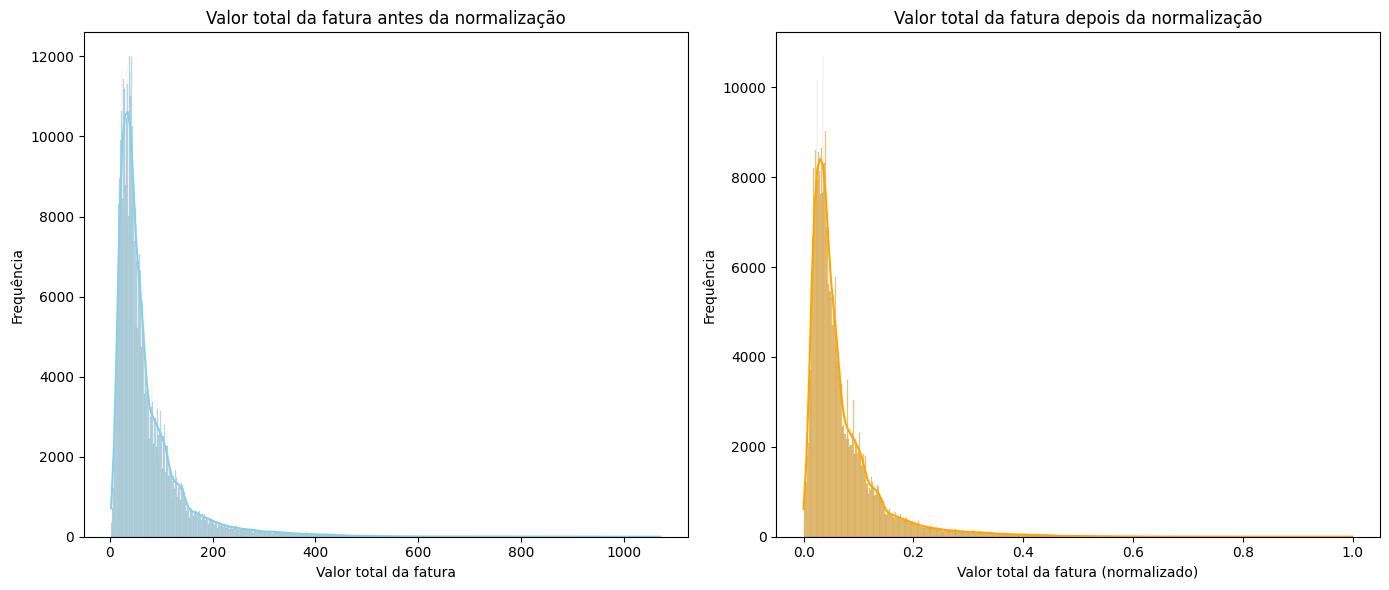

In [44]:
# Visualização da distribuição após a normalização (exemplo para TotalFatura)
plt.figure(figsize=(14, 6))

# Histograma 1: Antes da normalização
plt.subplot(1, 2, 1)
sns.histplot(df_fat_agg_ohe['TotalFatura'], kde=True, color='skyblue')
plt.title('Valor total da fatura antes da normalização')
plt.xlabel('Valor total da fatura')
plt.ylabel('Frequência')

# Histograma 2: Depois da normalização
plt.subplot(1, 2, 2)
sns.histplot(X_train_normalized_final['TotalFatura'], kde=True, color='orange')
plt.title('Valor total da fatura depois da normalização')
plt.xlabel('Valor total da fatura (normalizado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

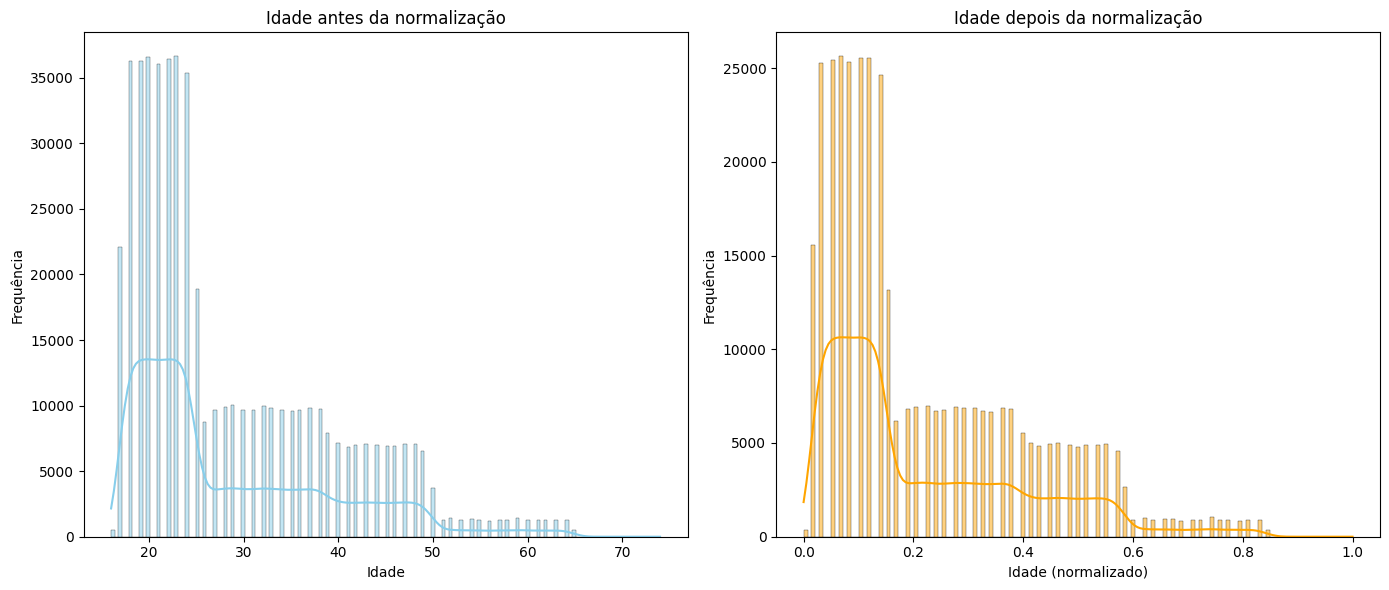

In [45]:
# Visualização da distribuição após a normalização (exemplo para Idade)
plt.figure(figsize=(14, 6))

# Histograma 1: Antes da normalização
plt.subplot(1, 2, 1)
sns.histplot(df_fat_agg_ohe['Idade'], kde=True, color='skyblue')
plt.title('Idade antes da normalização')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma 2: Depois da normalização
plt.subplot(1, 2, 2)
sns.histplot(X_train_normalized_final['Idade'], kde=True, color='orange')
plt.title('Idade depois da normalização')
plt.xlabel('Idade (normalizado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [46]:
# Exibindo as primeiras linhas dos dados normalizados
df_normalizado = pd.DataFrame(X_train_normalized_final, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalizado.head())


Primeiras 5 linhas dos dados normalizados (treino):
        TotalFatura     Idade  Pais_Deutschland  Pais_España  Pais_France  \
281737     0.027111  0.448276                 0            0            0   
26476      0.170168  0.103448                 0            0            0   
252243     0.014356  0.568966                 0            0            0   
153558     0.020608  0.224138                 0            0            0   
159709     0.023289  0.465517                 0            0            0   

        Pais_Portugal  Pais_United Kingdom  Pais_United States  Pais_中国  
281737              0                    0                   1        0  
26476               0                    0                   1        0  
252243              0                    0                   1        0  
153558              0                    0                   1        0  
159709              0                    0                   1        0  


Os gráficos gerados acima servem para comparar a distribuição das variáveis preditoras antes e depois da normalização.<p>
Observando esses gráficos, confirmamos que, após a normalização, os valores mantiveram a forma da distribuição original

## Padronização

In [47]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [48]:
# Aplicar o scaler APENAS nas colunas numéricas do conjunto de treino
X_train_numeric_standardized_array = scaler_std.fit_transform(X_train[col_numerica])

# Transformando o array NumPy de volta para um DataFrame, mantendo os nomes das colunas e o índice original
X_train_numeric_standardized_df = pd.DataFrame(X_train_numeric_standardized_array,
                                               columns=col_numerica,
                                               index=X_train.index)

# Transformando as colunas numéricas do conjunto de teste usando o scaler TREINADO em X_train
X_test_numeric_standardized_array = scaler_std.transform(X_test[col_numerica])
X_test_numeric_standardized_df = pd.DataFrame(X_test_numeric_standardized_array,
                                              columns=col_numerica,
                                              index=X_test.index)

# Concatenação: Combinando as colunas numéricas padronizadas com as colunas OHE, pois eles não participam da padronização
colunas_ohe_presentes_train = [col for col in X_train.columns if col.startswith('Pais_')]
colunas_ohe_presentes_test = [col for col in X_test.columns if col.startswith('Pais_')]

X_train_standardized_final = pd.concat([X_train_numeric_standardized_df, X_train[colunas_ohe_presentes_train]], axis=1)
X_test_standardized_final = pd.concat([X_test_numeric_standardized_df, X_test[colunas_ohe_presentes_test]], axis=1)

# Exibir as primeiras linhas dos dados de treino padronizados
print("\nPrimeiras 5 linhas dos dados de TREINO padronizados (X_train_standardized_final): ")
print(X_train_standardized_final.head())

# Exibir as primeiras linhas dos dados de teste padronizados
print("\nPrimeiras 5 linhas dos dados de TESTE padronizados (X_test_standardized_final): ")
print(X_test_standardized_final.head())



Primeiras 5 linhas dos dados de TREINO padronizados (X_train_standardized_final): 
        TotalFatura     Idade  Pais_Deutschland  Pais_España  Pais_France  \
281737    -0.601868  1.261546                 0            0            0   
26476      1.449765 -0.616937                 0            0            0   
252243    -0.784793  1.919014                 0            0            0   
153558    -0.695124  0.040532                 0            0            0   
159709    -0.656673  1.355470                 0            0            0   

        Pais_Portugal  Pais_United Kingdom  Pais_United States  Pais_中国  
281737              0                    0                   1        0  
26476               0                    0                   1        0  
252243              0                    0                   1        0  
153558              0                    0                   1        0  
159709              0                    0                   1        0  

Primeira

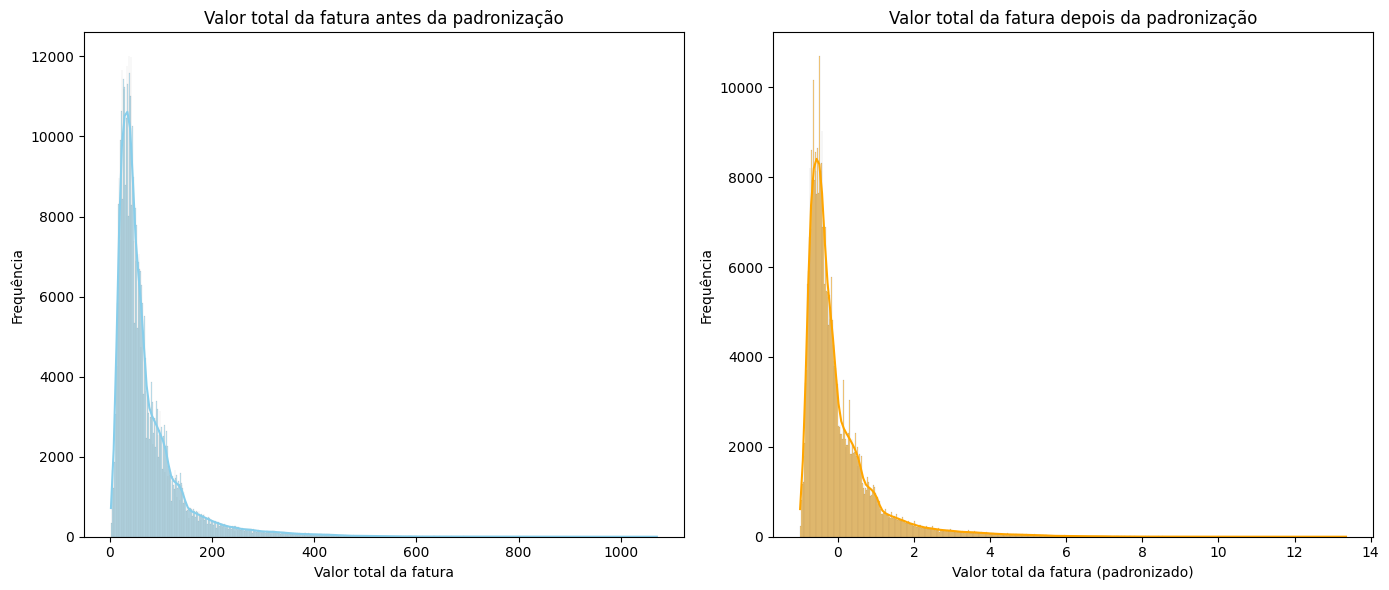

In [49]:
# Visualização da distribuição após a padronização (exemplo para TotalFatura)
plt.figure(figsize=(14, 6))

# Histograma 1: Antes da padronização
plt.subplot(1, 2, 1)
sns.histplot(df_fat_agg_ohe['TotalFatura'], kde=True, color='skyblue')
plt.title('Valor total da fatura antes da padronização')
plt.xlabel('Valor total da fatura')
plt.ylabel('Frequência')

# Histograma 2: Depois da padronização
plt.subplot(1, 2, 2)
sns.histplot(X_train_standardized_final['TotalFatura'], kde=True, color='orange')
plt.title('Valor total da fatura depois da padronização')
plt.xlabel('Valor total da fatura (padronizado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

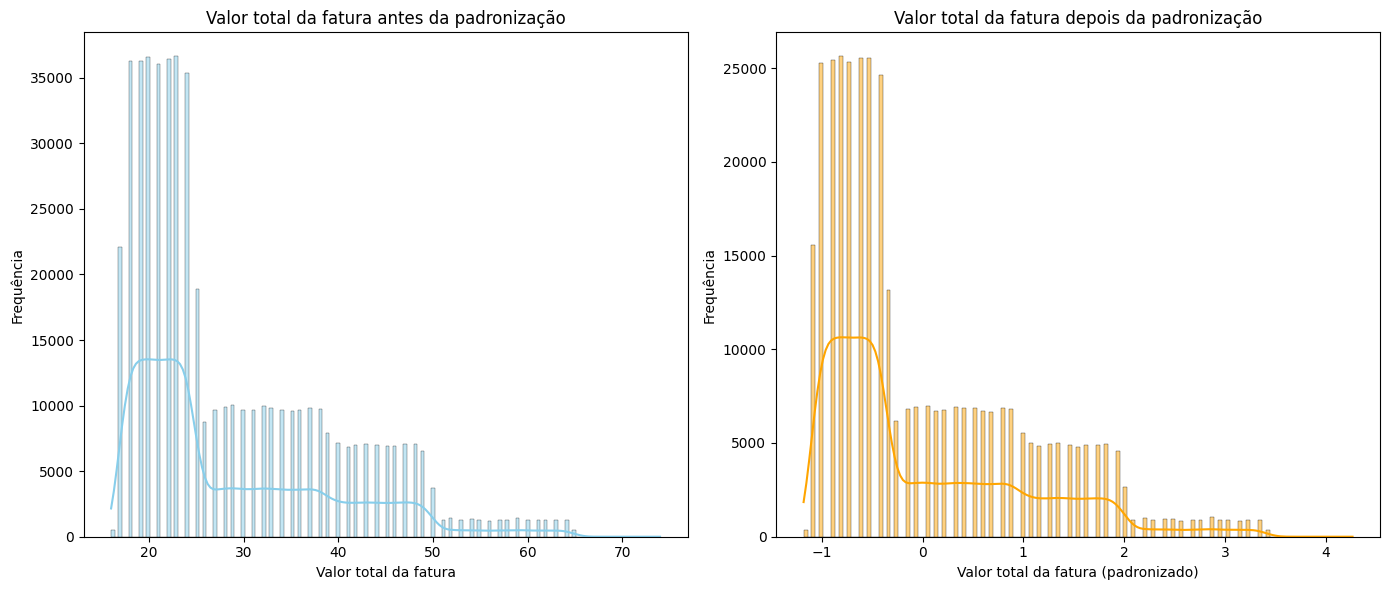

In [50]:
# Visualização da distribuição após a padronização (exemplo para Idade)
plt.figure(figsize=(14, 6))

# Histograma 1: Antes da padronização
plt.subplot(1, 2, 1)
sns.histplot(df_fat_agg_ohe['Idade'], kde=True, color='skyblue')
plt.title('Valor total da fatura antes da padronização')
plt.xlabel('Valor total da fatura')
plt.ylabel('Frequência')

# Histograma 2: Depois da padronização
plt.subplot(1, 2, 2)
sns.histplot(X_train_standardized_final['Idade'], kde=True, color='orange')
plt.title('Valor total da fatura depois da padronização')
plt.xlabel('Valor total da fatura (padronizado)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Com os gráficos acima, é possível confirmar a média próximo de 0 e o desvio padrão próximo de 1 após o processo de padronização

# Conclusão

Na Análise, foi visto que as correlações são baixas entre as variáveis numéricas. Isso indica que pode ser necessário uma melhor avaliação dos dados ou uma busca por outras tabelas com mais informações que permitam relacionar a Forma de pagamento com outro fator preditivo. Os gráficos foram extremamente importantes para confirmar isso. <p>
Mesmo diante disso, na etapa de Pré-processamento, foi feito o preparo para a modelagem futura.

As três hipóteses levantadas no início deste projeto foram avaliadas e não são válidas. Segue resumo a seguir:

1. _Transações de maior valor (TotalFatura) são mais propensas a usar cartão de crédito devido à conveniência ou disponibilidade de crédito_<p>
Pelos gráficos gerados, o pagamento por cartão de crédito não é influenciado pelo valor da fatura (TotalFatura)

2. _A forma de pagamento varia por localização (Pais)_<p>
A forma de pagamento por país varia pouco, sendo uma variação irrelevante para influenciar na forma de pagamento

3. _Clientes mais jovens (DataNascimento) preferem formas de pagamento digitais, como cartão de crédito, em vez de dinheiro_<p>
A maior parte dos pagamentos é por cartão de crédito. Não há preferência de pagamento por cartão de crédito pelos jovens mais do que por pessoas de mais idade